In [1]:
#import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r'C:\Users\lfakh\Downloads\coding_round_data.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.info()
#Data types all looking good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isnull().sum()
# No missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:ylabel='Revenue'>

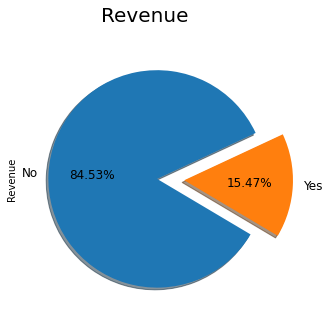

In [7]:
f, ax = plt.subplots(1,1, figsize=(10,5))

plt.suptitle('Revenue ', fontsize=20)

labels ="No", "Yes"

df["Revenue"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True,
                                             labels=labels, fontsize=12, startangle=25)
# dada is imbalanced

<AxesSubplot:>

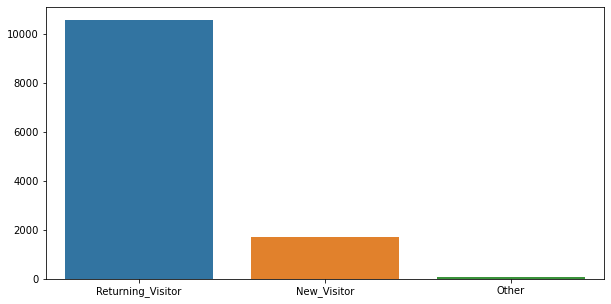

In [8]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(df['VisitorType'].value_counts().index,df['VisitorType'].value_counts().values)


In [9]:
month_values=[]
months_list=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

for ind,month in enumerate(months_list):
    temp=100*df[ (df.Month == months_list[ind]) &(df['Revenue']>0)].shape[0]/df[df.Month == months_list[ind]].shape[0]
    month_values.append(temp)
month_values=dict(zip(months_list,month_values))
sorted_month=dict(sorted(month_values.items(), key=lambda item: item[1]))

<AxesSubplot:title={'center':'Revenue rate per Month'}>

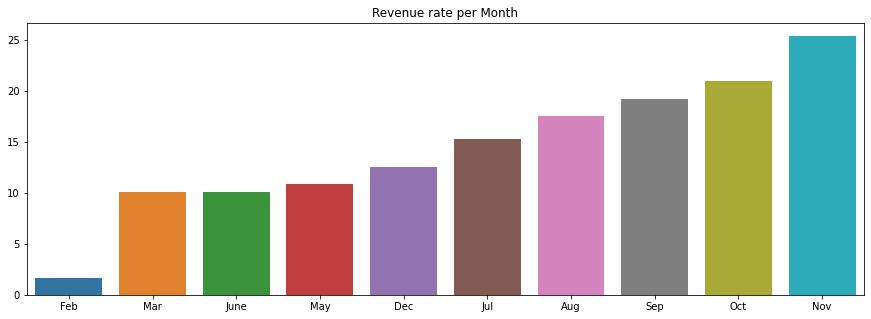

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize=(15, 5))
Months = list(sorted_month.keys())
values = list(sorted_month.values())
plt.title('Revenue rate per Month')
sns.barplot(Months,values)


**During black Friday and before chrismas the Revenue rate is highest, Nov,Oct,Sep also just before school opening Aug,Jul Feb has the lowest rate!!!**

In [11]:
visitor_values=[]
vistor_list=['Returning_Visitor','New_Visitor','Other']

for ind,month in enumerate(vistor_list):
    temp=100*df[ (df.VisitorType == vistor_list[ind]) &(df['Revenue']>0)].shape[0]/df[df.VisitorType == vistor_list[ind]].shape[0]
    visitor_values.append(temp)
visitor_values=dict(zip(vistor_list,visitor_values))
sorted_visitor=dict(sorted(visitor_values.items(), key=lambda item: item[1]))

<AxesSubplot:title={'center':'Revenue rate per VisitorType'}>

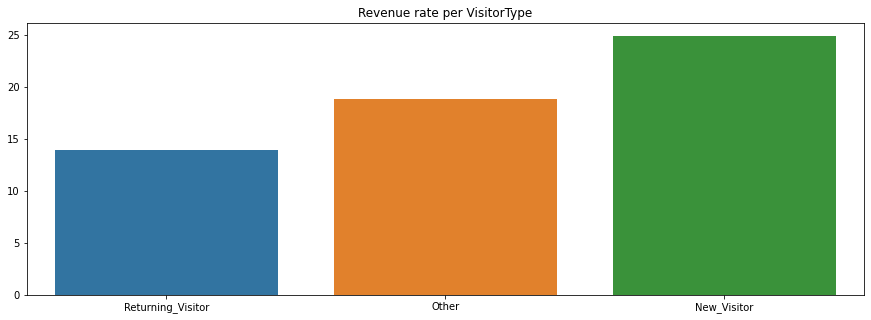

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize=(15, 5))
plt.title('Revenue rate per VisitorType')

visitors = list(sorted_visitor.keys())
values = list(sorted_visitor.values())
sns.barplot(visitors,values)


**Highest rate for the New Visitor**

Text(0, 0.5, 'Count-Not Purchased')

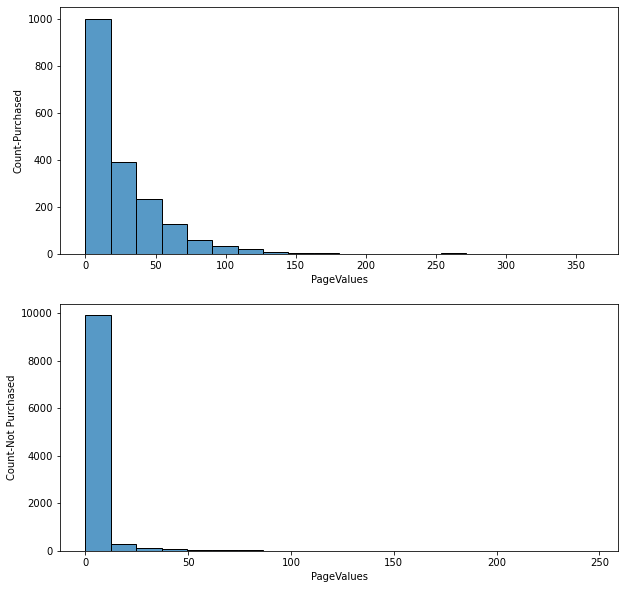

In [36]:
fig, axes = plt.subplots(figsize=(10, 10))
plt.subplot(2,1,1)
sns.histplot(df[df['Revenue']>0]['PageValues'],bins=20 )
plt.ylabel('Count-Purchased')

plt.subplot(2,1,2)
sns.histplot(df[df['Revenue']<1]['PageValues'],bins=20 )
plt.ylabel('Count-Not Purchased')

In [13]:
df["Revenue"] = df["Revenue"].astype(int)
df["Weekend"] = df["Weekend"].astype(int)


In [14]:
df=pd.get_dummies(df, columns=['VisitorType','Month'])

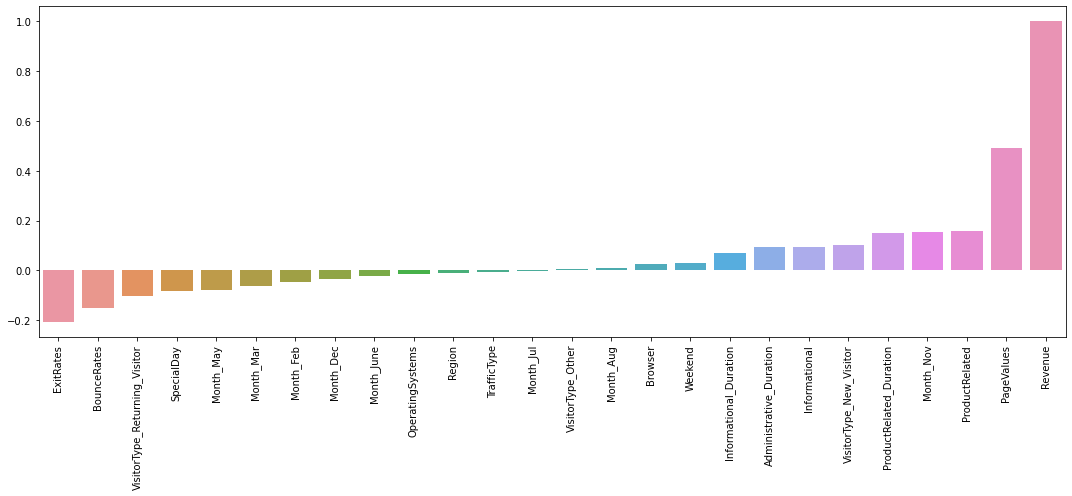

In [15]:
cor=df.corr()[1:-1]
corr_class=cor['Revenue']
fig, axes = plt.subplots(figsize=(15, 7))
sns.barplot(corr_class[:-1].sort_values().index,corr_class[:-1].sort_values().values)
plt.xticks(rotation=90)
plt.tight_layout()


**PageValues has the highest Correlation with Revenue**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

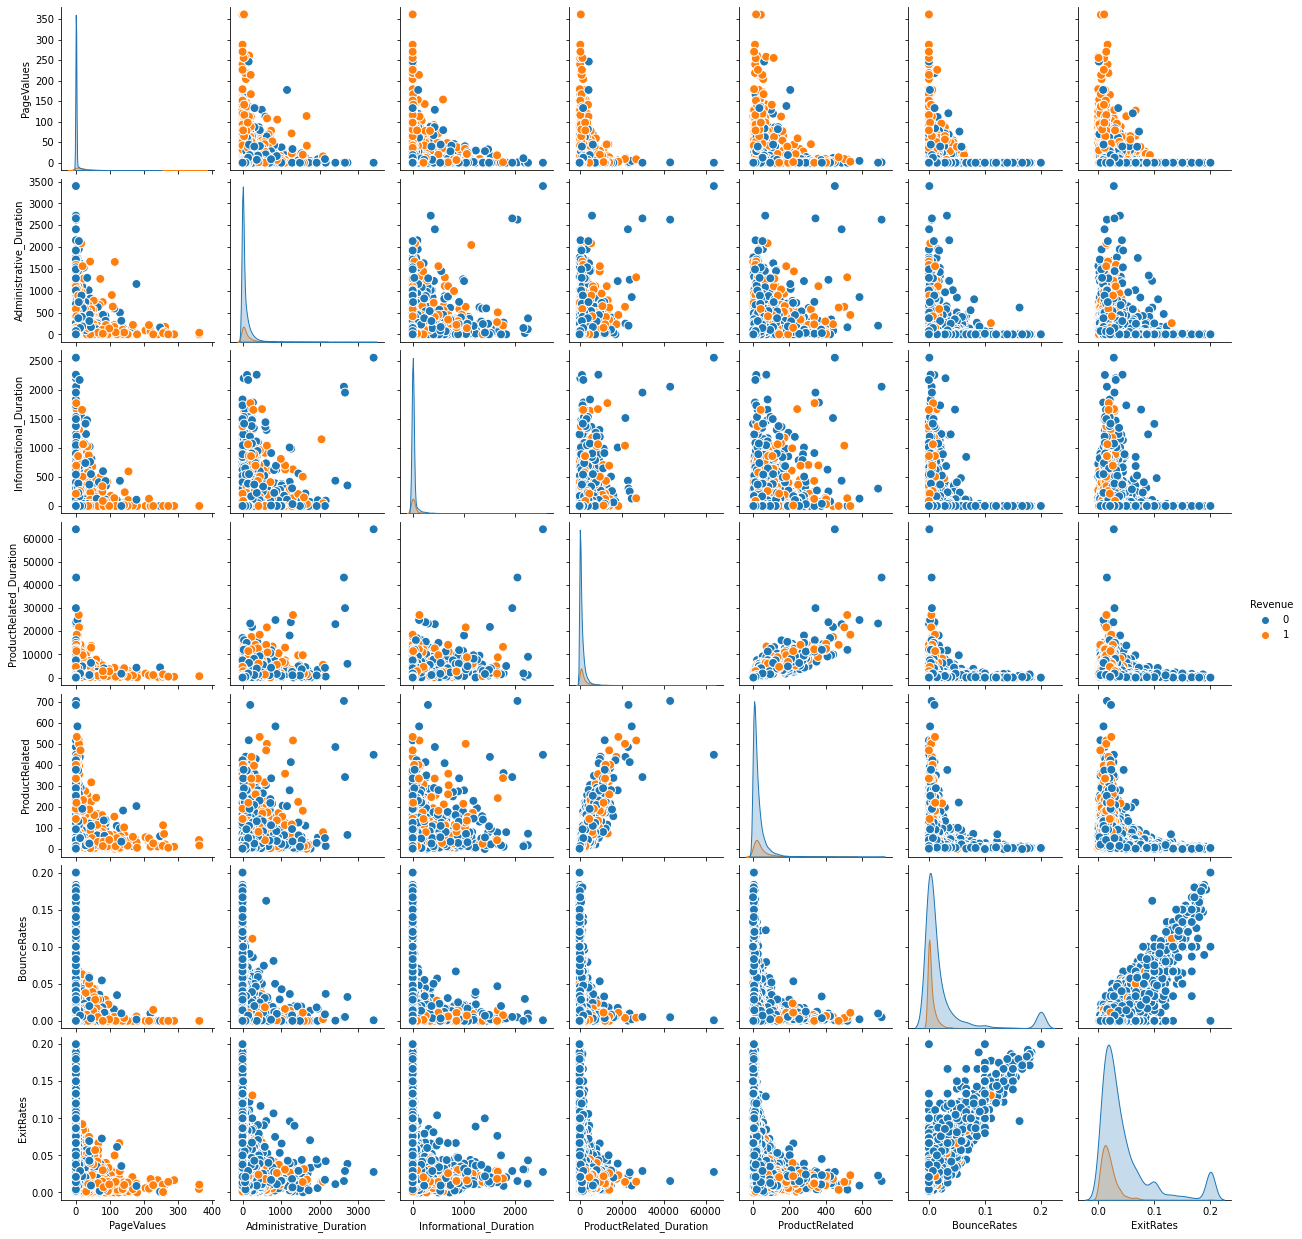

In [17]:
cols=['PageValues','Administrative_Duration','Informational_Duration','ProductRelated_Duration','ProductRelated','BounceRates','ExitRates']
sns.pairplot(df,vars=cols,hue='Revenue',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))


**visitor who visit the pages with high page valuesare are more likely to make a purchase. page values is a very important variable and is highly correlated with revenue**

**Visitor who visit more productrelated pages are more likely to make a purchase**

**BounceRates and ExitRates are very correlated which make sense because if thet bounce more probablity to purchase is higher**

**higher BounceRates or ExitRates less likely to make a purchase**

In [28]:
df.iloc[:,0:14].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [29]:
df.iloc[:,15:29].describe()

,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.154745,0.137388,0.006894,0.855718,0.035118,0.140065,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334
std,0.361676,0.344271,0.082745,0.351390,0.184084,0.347068,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
df[(df['Administrative']<1) & (df['Administrative_Duration']>0)]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep


In [45]:
df[(df['ProductRelated']<1) & (df['ProductRelated_Duration']>0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep


In [44]:
df[(df['Informational']<1) & (df['Informational_Duration']>0)]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
